In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from irt import IRTModel
from sklearn import svm
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from beta_irt.visualization.plots import newline
# from beta_irt.visualization.plots import plot_parameters
# from irt import beta_irt
from sklearn.decomposition import PCA
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import glob
from scipy.stats import spearmanr

In [3]:
name = 'mpg'

In [4]:
names = []
path = './Results_IRT/'+name+'/'
foldernames = glob.glob(path+'*/')
keys = list(map(lambda x: int(x[:-1].split('_')[-1]), foldernames))
keys = sorted(range(len(keys)), key=lambda k: keys[k])
foldernames = list(map(lambda k: foldernames[k], keys))
names = list(map(lambda x: x.split('/')[-2], foldernames))
max_std = int(names[-1].split('_')[-1])

In [5]:
foldernames

['./Results_IRT/mpg/noise_0/',
 './Results_IRT/mpg/noise_3/',
 './Results_IRT/mpg/noise_6/']

In [6]:
all_files = []
all_errors = []
for i, df in enumerate(foldernames):
    path = df
    filenames = glob.glob(path + "/*.csv")
    file_error = glob.glob(path + "/*.txt")
    print(file_error)
    
    filenames.sort()

    dfs = []
    for filename in filenames:
        dfs.append(pd.read_csv(filename))
        
    all_files.append(dfs)
    all_errors.append(pd.read_csv(file_error[0]))

['./Results_IRT/mpg/noise_0/errors_mpg_s79_f0_sd42.txt']
['./Results_IRT/mpg/noise_3/errors_mpg_s79_f3_sd42.txt']
['./Results_IRT/mpg/noise_6/errors_mpg_s79_f6_sd42.txt']


In [7]:
filenames

['./Results_IRT/mpg/noise_6/irt_ability_vi_mpg_s79_f6_sd42_am1@0_as1@0.csv',
 './Results_IRT/mpg/noise_6/irt_data_mpg_s79_f6_sd42.csv',
 './Results_IRT/mpg/noise_6/irt_parameters_vi_mpg_s79_f6_sd42_am1@0_as1@0.csv',
 './Results_IRT/mpg/noise_6/xtest_mpg_s79_f6_sd42.csv']

# Histograms Responses

In [8]:
plts = ['Original', 'Noise 1', 'Noise 2']

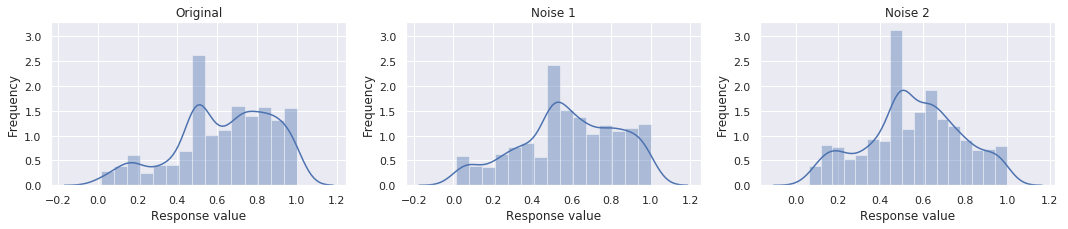

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18,3))
scale = 0
for i, data in enumerate(all_files):
    values = data[1].values.reshape(-1,1)
    sns.distplot(values, ax= axes[i])
    current_scale = axes[i].get_ylim()[1] - axes[i].get_ylim()[0]
    if current_scale > scale:
        scale = current_scale
        y_lim = axes[i].get_ylim()
    axes[i].set_title(plts[i])
    axes[i].set_xlabel('Response value')
    axes[i].set_ylabel('Frequency')
for ax in axes:
    ax.set_ylim(y_lim)
fig.savefig('./Results_IRT/'+name+'/hists.png')

# Difficulty/ Discrimination

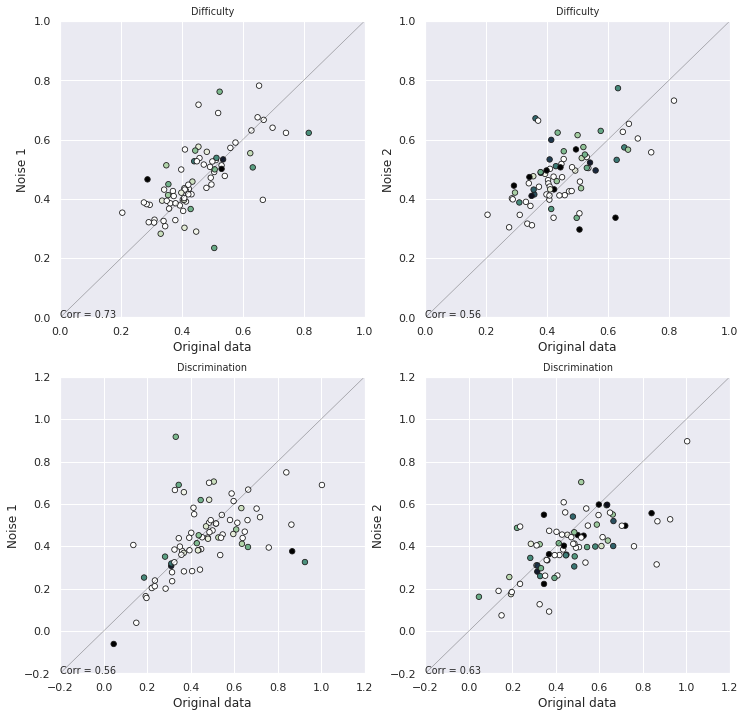

In [10]:
plot = ["Difficulty", "Discrimination"]
#Lower noise
scale = 0
fig, axes = plt.subplots(2, 2, figsize=(12,12))

for i, title in enumerate(plot):
    for j in range(1,3):
        if i == 0:
            lim = np.array([0,1])
        else:
            lim = np.array([-0.2, 1.2])
        
        axes[i,j-1].set_xlim(lim)
        axes[i,j-1].set_ylim(lim)
        axes[i,j-1].plot([lim[0],lim[1]], [lim[0], lim[1]], linewidth=0.2, c='black')        
        
        sns.set_context('paper')
        cmap1 = sns.cubehelix_palette(rot=-.5,light=1.5,dark=-.5,as_cmap=True)

        axes[i,j-1].text(x = lim[0], y = lim[0], s='Corr = %.2f' %(spearmanr(a = all_files[0][2].iloc[:,i], b = all_files[j][2].iloc[:,i])[0]))
        axes[i, j-1].scatter(all_files[0][2].iloc[:,i], all_files[j][2].iloc[:,i], c = np.absolute(all_files[j][3].iloc[:,-1]), cmap = cmap1, edgecolor='k',s=30)

        axes[i,j-1].set_xlabel("Original data")
        axes[i,j-1].set_ylabel(plts[j])
        axes[i,j-1].set_title(title)
fig.savefig('./Results_IRT/'+name+'/parameters.png')

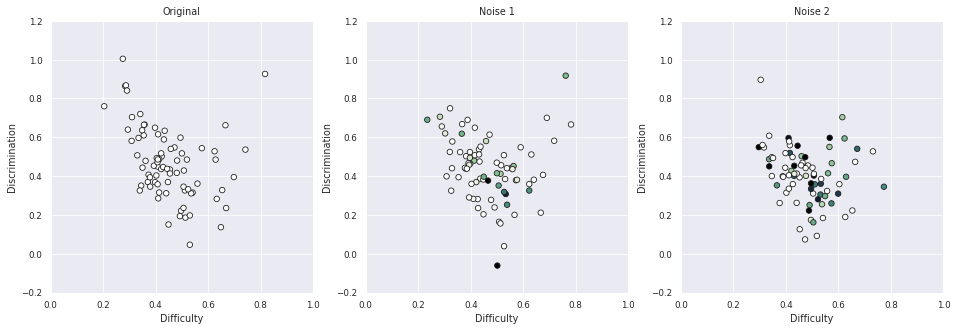

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for i, noisy in enumerate(names):
    if i>0:
        c = np.absolute(all_files[i][3].iloc[:,-1])
    else:
        c = np.zeros(len(all_files[i][2]))
    axes[i].scatter(all_files[i][2].iloc[:,0], all_files[i][2].iloc[:,1], c = c, cmap = cmap1, edgecolor='k',s=30)
    axes[i].set_title(plts[i])
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([-0.2, 1.2])
    axes[i].set_xlabel('Difficulty')
    axes[i].set_ylabel('Discrimination')
fig.savefig('./Results_IRT/'+name+'/dif_disc')

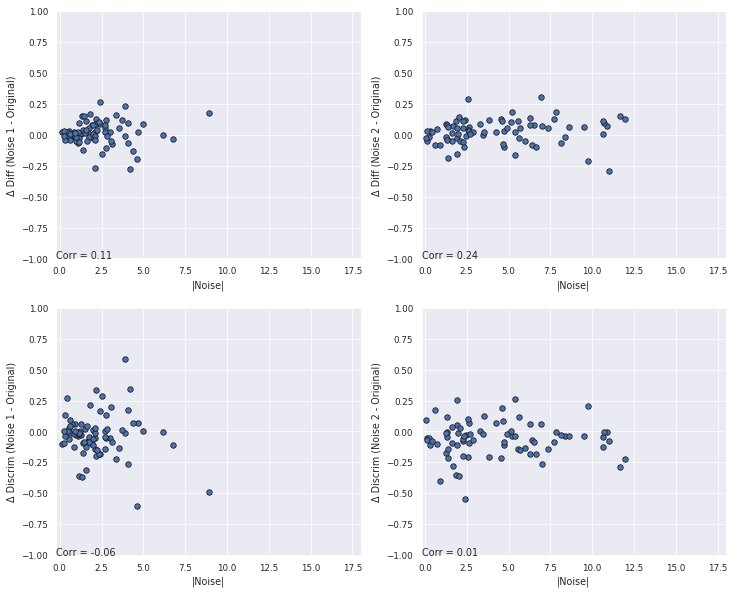

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
for h, param in enumerate(['Diff', 'Discrim']):
    for i in range(2):
        axes[h, i].scatter(np.absolute(all_files[i+1][3].iloc[:, -1]), (all_files[i+1][2].iloc[:,h] - all_files[0][2].iloc[:,h]), edgecolor='k',s=30)
        axes[h, i].set_ylim([-1., 1.])
        axes[h, i].set_xlim([-.2, 3*max_std])
        axes[h, i].text(x = -.2, y = -1, s='Corr = %.2f' %(spearmanr(a = np.absolute(all_files[i+1][3].iloc[:, -1]), b = (all_files[i+1][2].iloc[:,h] - all_files[0][2].iloc[:,h]))[0]))

        axes[h, i].set_xlabel('|Noise|')
        axes[h, i].set_ylabel('Δ '+param+' ('+plts[i+1]+' - Original)')
fig.savefig('./Results_IRT/'+name+'/param_noise')

# Ability

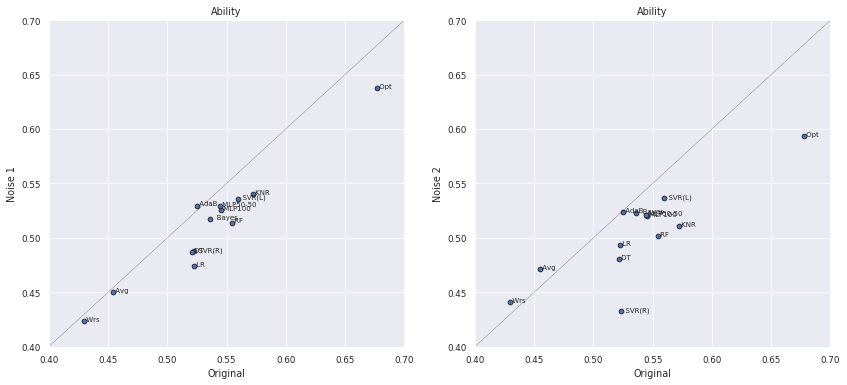

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
mdls = mdls = ['LR', '  Bayes', ' SVR(L)', ' SVR(R)', 'KNR', 'DT', 'RF', 'AdaB', 'MLP100', 'MLP50-50', 'Opt', 'Avg', 'Wrs']
lim = [0.4, 0.7]

for i, noisy in enumerate(plts[1:]):
    axes[i].scatter(all_files[0][0].iloc[:-1, -1], all_files[i+1][0].iloc[:-1, -1], edgecolor='k')
    for j, txt in enumerate(mdls):
        axes[i].text(all_files[0][0].iloc[j, -1], all_files[i+1][0].iloc[j, -1], ' '+txt, fontsize=7)
    axes[i].set_xlim(lim)
    axes[i].set_ylim(lim)
    axes[i].set_xlabel('Original')
    axes[i].set_ylabel(noisy)
    axes[i].set_title('Ability')
    axes[i].plot(lim, lim, linewidth=0.2, c='black')
fig.savefig('./Results_IRT/'+name+'/ability')

# Error

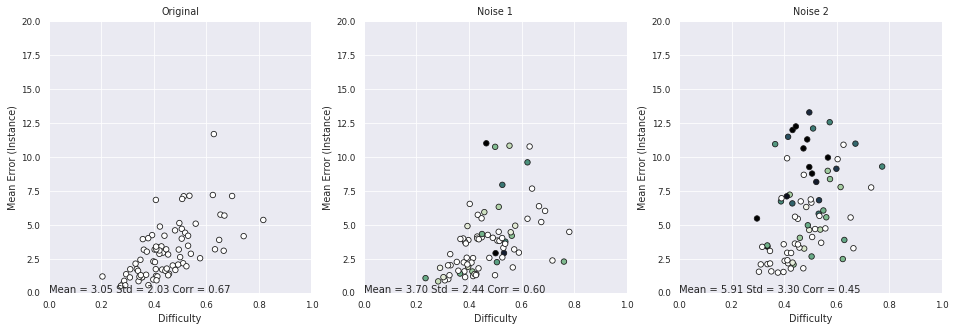

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for i, error in enumerate(all_errors):
    if i>0:
        c = np.absolute(all_files[i][3].iloc[:,-1])
    else:
        c = np.zeros(len(all_files[i][2]))
    mean_error = np.absolute(error).mean(axis = 1)
    diff = all_files[i][2].iloc[:,0]
    axes[i].scatter(diff,mean_error, c= c, cmap = cmap1, edgecolor='k',s=30)
    axes[i].text(x = 0, y = 0, s='Mean = %.2f Std = %.2f Corr = %.2f' %(mean_error.mean(), mean_error.std(), spearmanr(a = diff, b = mean_error)[0]), fontsize=10)
    axes[i].set_xlabel('Difficulty')
    axes[i].set_ylabel('Mean Error (Instance)')
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([0, 20])
    axes[i].set_title(plts[i])
fig.savefig('./Results_IRT/'+name+'/diff_error')

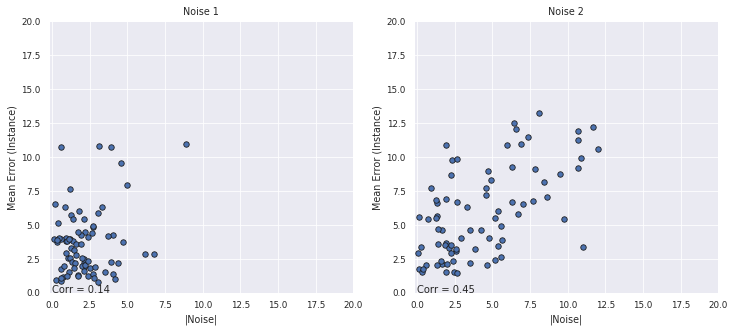

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for i, error in enumerate(all_errors[1:]):
    mean_error = np.absolute(error).mean(axis = 1)
    noise = all_files[i+1][3].iloc[:, -1]
    axes[i].scatter(np.absolute(noise), mean_error, edgecolor='k',s=30)
    axes[i].text(x = 0, y = 0, s='Corr = %.2f' %(spearmanr(a = diff, b = mean_error)[0]), fontsize=10)
    axes[i].set_xlabel('|Noise|')
    axes[i].set_ylabel('Mean Error (Instance)')
    axes[i].set_xlim([-0.2,20])
    axes[i].set_ylim([0, 20])
    axes[i].set_title(plts[i+1])
fig.savefig('./Results_IRT/'+name+'/noise_error')

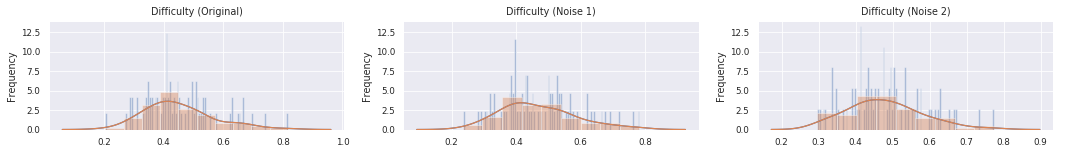

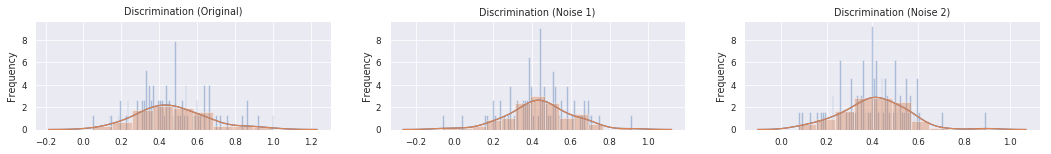

In [16]:
for h, param in enumerate(plot):
    sns.set_context('paper')
    scale = 0
    fig, axes = plt.subplots(1, 3, figsize=(18,2))
    for i, data in enumerate(all_files):
        values = data[2].iloc[:, h].values.reshape(-1,1)
        sns.distplot(values,bins=100,ax=axes[i])
        sns.distplot(values, ax= axes[i])
        current_scale = axes[i].get_ylim()[1] - axes[i].get_ylim()[0]
        if current_scale > scale:
            scale = current_scale
            y_lim = axes[i].get_ylim()
        axes[i].set_title(param + ' (' + plts[i] + ')')
        axes[i].set_ylabel('Frequency')
    for ax in axes:
        ax.set_ylim(y_lim)
    fig.subplots_adjust(hspace=0.3)
    fig.savefig('./Results_IRT/'+name+'/hists_' + param + '.png')

In [17]:
for i, noise in enumerate(plts):
    metrics = pd.DataFrame()
    metrics['Avg. Response'] = all_files[i][1].iloc[:, :-3].mean(axis = 0)
    metrics['Ability'] = all_files[i][0].iloc[:-4, 1].values
    metrics['MAE'] = np.absolute(all_errors[i]).mean(axis = 0)
    metrics['MSE'] = (all_errors[i]**2).mean(axis = 0)
    print(noise,'\n',metrics.corr(method = 'spearman'),'\n\n')

Original 
                Avg. Response   Ability       MAE       MSE
Avg. Response       1.000000  0.866667 -0.684848 -0.684848
Ability             0.866667  1.000000 -0.624242 -0.636364
MAE                -0.684848 -0.624242  1.000000  0.975758
MSE                -0.684848 -0.636364  0.975758  1.000000 


Noise 1 
                Avg. Response   Ability       MAE       MSE
Avg. Response       1.000000  0.515152 -0.951515 -0.842424
Ability             0.515152  1.000000 -0.418182 -0.357576
MAE                -0.951515 -0.418182  1.000000  0.951515
MSE                -0.842424 -0.357576  0.951515  1.000000 


Noise 2 
                Avg. Response   Ability       MAE       MSE
Avg. Response       1.000000  0.733333 -0.927273 -0.890909
Ability             0.733333  1.000000 -0.612121 -0.539394
MAE                -0.927273 -0.612121  1.000000  0.975758
MSE                -0.890909 -0.539394  0.975758  1.000000 


